<b> Project UAS Berpikir Komputasi
<br> Nama : Revanola Gusti Syahrani
<br> NIM  : 06111282328016

<div align="justify">

# **Simulasi Perambatan Gelombang 2D dengan Metode Finite Difference**

Gelombang merupakan fenomena penting dalam fisika, muncul pada suara, gempa, gelombang air dan elektromagnetik. Perambatan gelombang 2D dapat dijelaskan menggunakan **Persamaan Gelombang Dua Dimensi:**

<br>
$$
\frac{\partial^2 u}{\partial t^2}
=
c^2\left(
\frac{\partial^2 u}{\partial x^2}
+
\frac{\partial^2 u}{\partial y^2}
\right)
$$

Dengan:
<br> (x, y, t) = Amplitudo gelombang
<br> c = Kecepatan rambat
<br> Turunan ruang = perubahan bentuk gelombang


<br> **Metode Finite Difference (FDM)**

Metode FDM bekerja dengan mendiskritisasi domain menjadi grid, lalu mendekati turunan dengan *central difference*.

<br> **Turunan Kedua Waktu**
<br>
<br>
$$
\frac{\partial^2 u}{\partial t^2}
=
\frac{
u^{k+1}_{i,j}
-
2u^k_{i,j}
+
u^{k-1}_{i,j}
}{(\Delta t)^2}
$$

<br> **Turunan Kedua Ruang Arah X**
<br>
<br>
$$
\frac{\partial^2 u}{\partial x^2}
=
\frac{
u^k_{i+1,j}
-
2u^k_{i,j}
+
u^k_{i-1,j}
}{(\Delta x)^2}
$$

<br> **Turunan Kedua Ruang Y**
<br>
<br>
$$
\frac{
u^{k+1}_{i,j}
-
2u^k_{i,j}
+
u^{k-1}_{i,j}
}{(\Delta t)^2}
=
c^2
\left[
\frac{
u^k_{i+1,j}
-
2u^k_{i,j}
+
u^k_{i-1,j}
}{(\Delta x)^2}
+
\frac{
u^k_{i,j+1}
-
2u^k_{i,j}
+
u^k_{i,j-1}
}{(\Delta y)^2}
\right]
$$

<br> **Asumsi $$
\Delta x = \Delta y = h
$$**
<br> **Persamaan Diskritisasi Gelombang 2D**
<br>
<br>
$$
u^{k+1}_{i,j} =
2u^k_{i,j} - u^{k-1}_{i,j} +
\frac{c^2 (\Delta t)^2}{h^2}
\left(
u^k_{i+1,j} +
u^k_{i-1,j} +
u^k_{i,j+1} +
u^k_{i,j-1} -
4u^k_{i,j}
\right)
$$

<br> **Dengan parameter Courant:**
<br>
<br>
$$
b = \frac{c^2 (\Delta t)^2}{h^2}
$$

<br> **Kondisi Stabilitas:**
<br>
$$
r < \frac{1}{\sqrt{2}}
$$

**Yang secara numerik dapat ditulis:**

$$
r < 0.707
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_center(nx, ny, sigma):
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    X, Y = np.meshgrid(x, y)
    return np.exp(-1/sigma**2 * ((X - 0.5)**2 + (Y - 0.5)**2))

def run_simulation(u0, c, dx, dt, nt, bc="fixed", damping=0.0):
    nx, ny = u0.shape
    u = u0.copy()
    u_prev = u0.copy()
    u_next = np.zeros_like(u0)

    r_squared = (c * dt / dx)**2

    for n in range(nt):
        u_next[1:-1, 1:-1] = (
            (2 * u[1:-1, 1:-1] - u_prev[1:-1, 1:-1]) * (1 - damping)
            + r_squared * (
                u[2:, 1:-1] + u[:-2, 1:-1] +
                u[1:-1, 2:] + u[1:-1, :-2] -
                4 * u[1:-1, 1:-1]
            )
        )

        if bc == "fixed":
            u_next[0, :] = 0
            u_next[-1, :] = 0
            u_next[:, 0] = 0
            u_next[:, -1] = 0

        u_prev = u.copy()
        u = u_next.copy()

    return u

## **Perbandingan Perambatan Gelombang tanpa Redaman dan dengan Redaman**

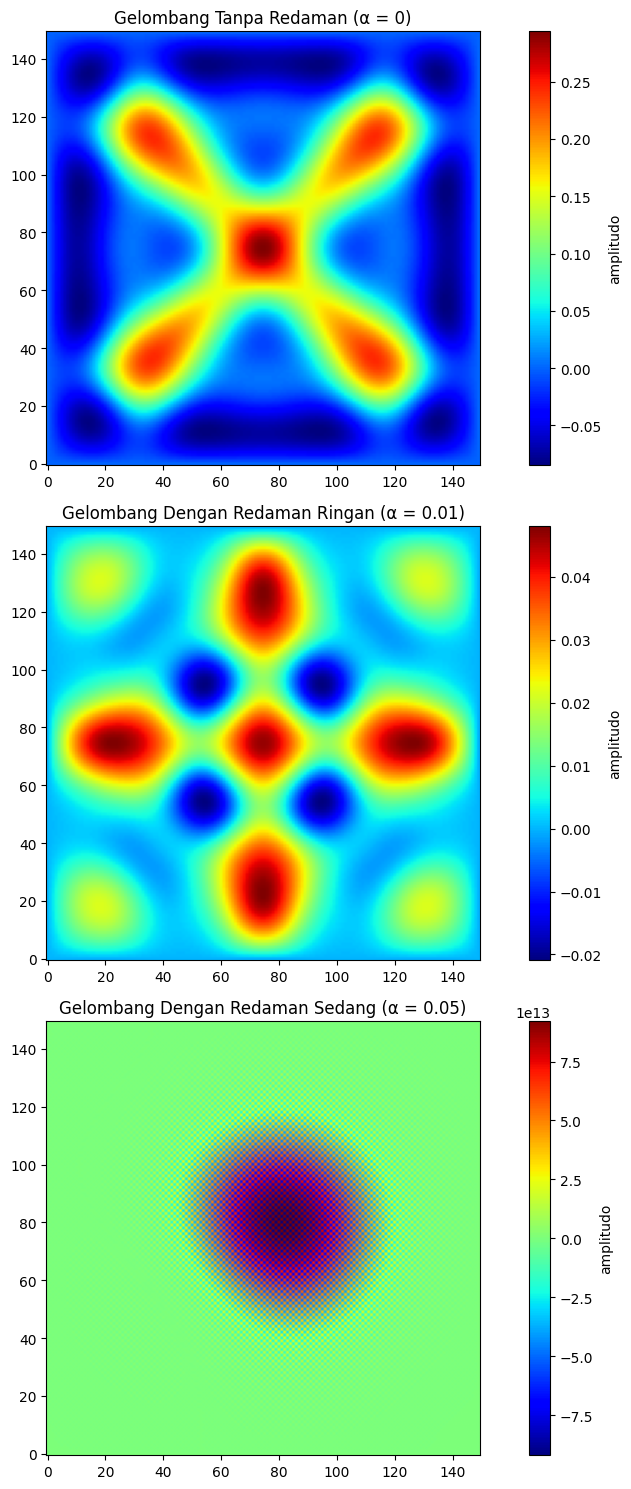

In [ ]:
nx, ny = 150, 150
u0 = gaussian_center(nx, ny, sigma)
dx = 0.01
dy = 0.01
dt = 0.007
c = 1.0
nt = 300
r_squared = (c * dt / dx)**2

U_0    = run_simulation(u0, c=c, dx=dx, dt=dt, nt=nt, bc="fixed", damping=0.0)
U_001  = run_simulation(u0, c=c, dx=dx, dt=dt, nt=nt, bc="fixed", damping=0.01)
U_005  = run_simulation(u0, c=c, dx=dx, dt=dt, nt=nt, bc="fixed", damping=0.05)

plt.figure(figsize=(10, 15))

plt.subplot(3,1,1)
plt.imshow(U_0, origin='lower', cmap='jet')
plt.title('Gelombang Tanpa Redaman (α = 0)')
plt.colorbar(label='amplitudo')

plt.subplot(3,1,2)
plt.imshow(U_001, origin='lower', cmap='jet')
plt.title('Gelombang Dengan Redaman Ringan (α = 0.01)')
plt.colorbar(label='amplitudo')

plt.subplot(3,1,3)
plt.imshow(U_005, origin='lower', cmap='jet')
plt.title('Gelombang Dengan Redaman Sedang (α = 0.05)')
plt.colorbar(label='amplitudo')

plt.tight_layout()
plt.show()

<div align="justify">

# HASIL 1 (α = 0)
*   Gelombang menyebar ke seluruh kotak dengan sempurna
*   Polanya sangat jelas dan simetris (seperti pola silang X)
*   Tinggi gelombang sama di semua tempat
*   Gelombang terus bergerak tanpa berhenti

# HASIL 2 (α = 0.01)
*   Gelombang masih menyebar, tapi mulai melemah
*   Polanya jadi tidak beraturan
*   Gelombang di pinggir kolam sudah jauh lebih kecil
*   Ada titik-titik tertentu yang gelombangnya masih tinggi (warna merah)

# HASIL 3 (α = 0.05)
*   Gelombang hampir tidak menyebar sama sekali
*   Hanya terlihat "benjolan" di tempat batu jatuh
*   Energi langsung hilang di sekitar pusat
*   Seperti melempar batu ke dalam bubur atau madu

<div align="justify">

**Pertanyaan**
1. Apa pengaruh redaman terhadap kecepatan penyebaran gelombang?

**Jawaban:**
Redaman membuat gelombang merambat lebih lambat dan tidak bisa menjangkau jarak yang jauh. Ini terjadi karena redaman mengubah cara gelombang bergerak dalam medium. Tanpa redaman, gelombang bisa menyebar dengan cepat ke seluruh area, tetapi dengan adanya redaman, sebagian energi gelombang berubah menjadi panas atau diserap oleh medium sehingga kecepatan penyebarannya melambat.
Perlambatan ini terjadi karena energi gelombang terus berkurang selama perambatan. Semakin besar redaman, semakin banyak energi yang hilang per satuan jarak, sehingga gelombang tidak bisa menyebar dengan cepat.

2. Pada simulasi dengan α = 0.05, mengapa pola gelombang tampak lebih cepat melemah dibandingkan dua simulasi lainnya?

**Jawaban:** Gelombang pada α = 0.05 melemah sangat cepat karena koefisien redamannya lima kali lebih besar dari α = 0.01, sehingga hambatannya jauh lebih kuat. Ini seperti perbedaan berjalan di air dengan berjalan di madu, semakin kental mediumnya, semakin cepat energi kita habis.

## **Perbandingan Perambatan Gelombang dengan Courant Number Berbeda (r = 0.2, 0.5, 0.7)**

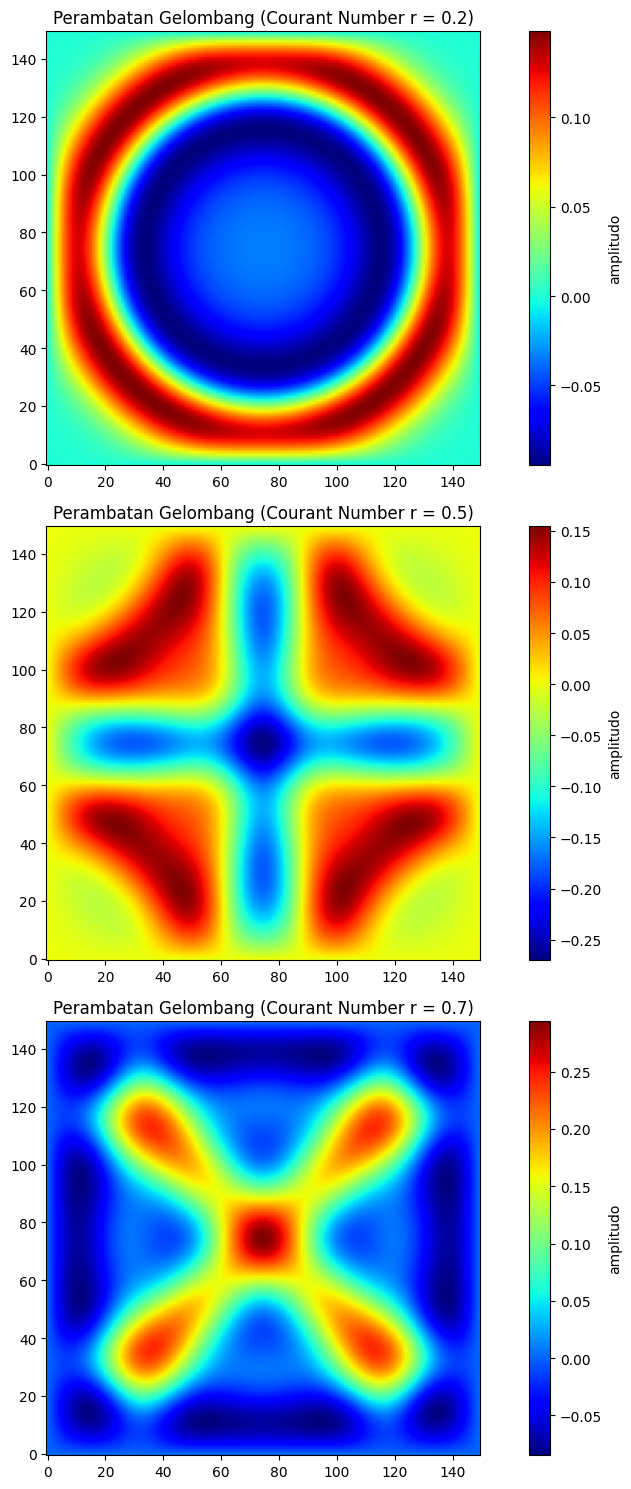

In [ ]:
c_val = 1.0

dt_r02 = 0.2 * dx / c_val
dt_r05 = 0.5 * dx / c_val
dt_r07 = 0.7 * dx / c_val

U_r02 = run_simulation(u0, c=c_val, dx=dx, dt=dt_r02, nt=nt, bc="fixed", damping=0.0)
U_r05 = run_simulation(u0, c=c_val, dx=dx, dt=dt_r05, nt=nt, bc="fixed", damping=0.0)
U_r07 = run_simulation(u0, c=c_val, dx=dx, dt=dt_r07, nt=nt, bc="fixed", damping=0.0)

plt.figure(figsize=(10, 15))

plt.subplot(3,1,1)
plt.imshow(U_r02, origin='lower', cmap='jet')
plt.title("Perambatan Gelombang (Courant Number r = 0.2)")
plt.colorbar(label='amplitudo')

plt.subplot(3,1,2)
plt.imshow(U_r05, origin='lower', cmap='jet')
plt.title("Perambatan Gelombang (Courant Number r = 0.5)")
plt.colorbar(label='amplitudo')

plt.subplot(3,1,3)
plt.imshow(U_r07, origin='lower', cmap='jet')
plt.title("Perambatan Gelombang (Courant Number r = 0.7)")
plt.colorbar(label='amplitudo')

plt.tight_layout()
plt.show()


<div align="justify">

# HASIL 1 (r = 0.2)
*   Gelombang menyebar membentuk lingkaran sempurna dari pusat
*   Polanya sangat simetris dan teratur (bentuk konsentris)
*   Amplitudo terdistribusi merata ke segala arah
*   Gelombang merambat stabil tanpa distorsi

# HASIL 2 (r = 0.5)
*   Gelombang mulai terdistorsi membentuk pola silang (cross pattern)
*   Polanya jadi tidak simetris melingkar lagi
*   Muncul empat lobus segitiga dengan intensitas tinggi (warna merah)
*   Dispersi numerik mulai terlihat jelas

# HASIL 3 (r = 0.7)
*   Gelombang sangat terdistorsi dengan pola geometris kompleks
*   Polanya tidak beraturan (bentuk belah ketupat dan segitiga tajam)
*   Struktur gelombang tidak fisik dan tidak stabil
*   Solusi numerik mengalami error propagasi yang parah

<div align="justify">

**Pertanyaan**
1. Mengapa nilai r yang lebih besar (mendekati batas stabilitas) menghasilkan pola gelombang yang lebih cepat menyebar dibandingkan r kecil?


**Jawaban:** Nilai r yang lebih besar menghasilkan pola gelombang yang menyebar lebih cepat karena timestep (Δt) yang digunakan dalam simulasi lebih besar. Ketika timestep lebih besar, informasi gelombang dalam komputasi numerik akan "melompat" lebih jauh pada grid dalam satu iterasi perhitungan, sehingga gelombang numerik bergerak lebih cepat. Namun, kecepatan penyebaran yang lebih cepat ini bukanlah kecepatan fisik yang sebenarnya, melainkan merupakan artifak atau error numerik akibat diskritisasi waktu yang terlalu besar.

## **Perbandingan Perambatan Gelombang dengan Kecepatan Gelombang c Berbeda**

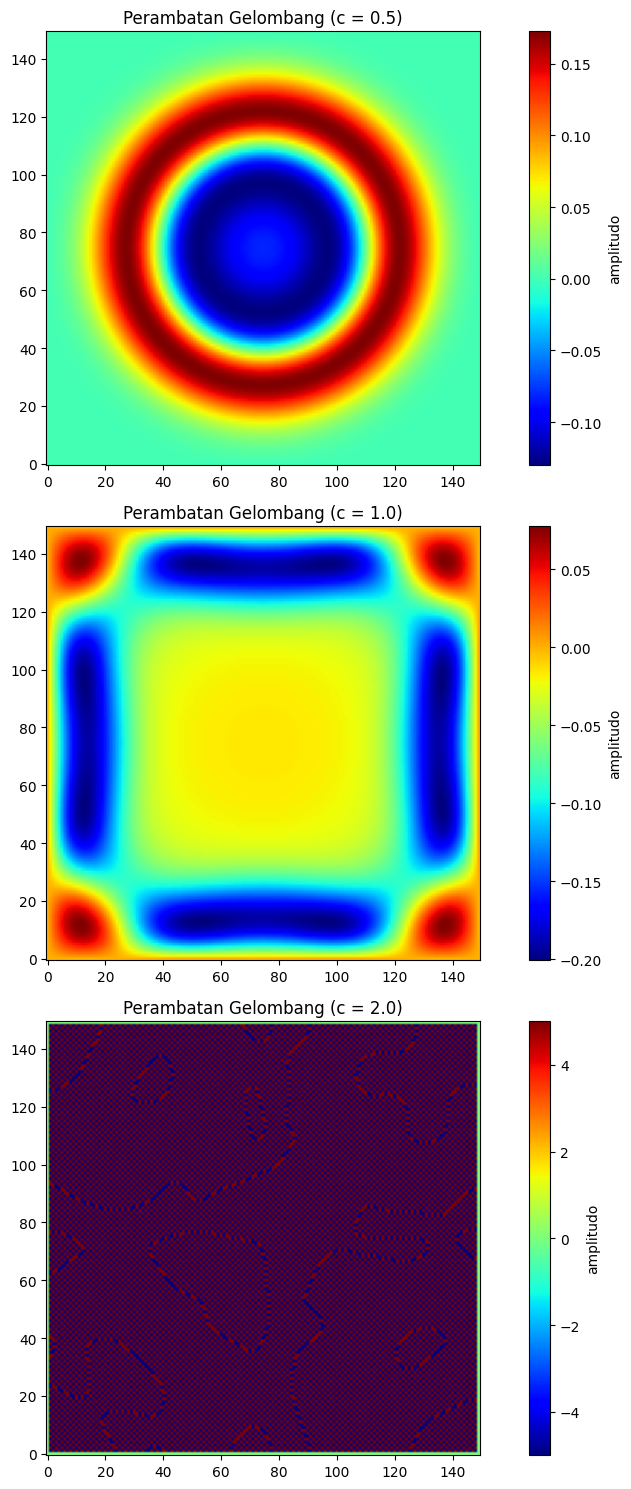

In [ ]:
def stabilize(U):
    U = np.nan_to_num(U)
    U = np.clip(U, -5, 5)
    return U

nt_short = 120

U_c05 = run_simulation(u0, c=0.5, dx=dx, dt=dt, nt=nt_short, bc="fixed", damping=0.0)
U_c10 = run_simulation(u0, c=1.0, dx=dx, dt=dt, nt=nt_short, bc="fixed", damping=0.0)
U_c20 = run_simulation(u0, c=2.0, dx=dx, dt=dt, nt=nt_short, bc="fixed", damping=0.0)

U_c05 = stabilize(U_c05)
U_c10 = stabilize(U_c10)
U_c20 = stabilize(U_c20)

plt.figure(figsize=(10, 15))

plt.subplot(3,1,1)
plt.imshow(U_c05, origin='lower', cmap='jet')
plt.title("Perambatan Gelombang (c = 0.5)")
plt.colorbar(label='amplitudo')

plt.subplot(3,1,2)
plt.imshow(U_c10, origin='lower', cmap='jet')
plt.title("Perambatan Gelombang (c = 1.0)")
plt.colorbar(label='amplitudo')

plt.subplot(3,1,3)
plt.imshow(U_c20, origin='lower', cmap='jet')
plt.title("Perambatan Gelombang (c = 2.0)")
plt.colorbar(label='amplitudo')

plt.tight_layout()
plt.show()

<div align="justify">

# HASIL 1 (c = 0.5)
*   Pada media dengan kecepatan rambat kecil, energi gelombang menyebar perlahan.
*   Simulasi stabil karena memenuhi syarat stabilitas metode numerik.
*   Pola lingkaran menandakan media isotropik, gelombang menyebar sama ke segala arah.

# HASIL 2 (c = 1.0)
*   Kecepatan rambat lebih besar, gelombang menyebar lebih cepat.
*   Distorsi muncul karena refleksi pada batas domain dan efek grid (kotak) dari metode finite difference menyebabkan gelombang tidak lagi sempurna lingkaran.
*   Metode FD lebih akurat saat kecepatan kecil.

# HASIL 3 (C = 0.2)
*   Menunjukkan ketidakstabilan numerik.
Secara fisik gelombang bukan seperti itu, tetapi simulasi rusak karena pelanggaran syarat stabilitas sehingga solusi tidak stabil dan tampak sebagai noise, bukan gelombang.

<div align="justify">

**Pertanyaan**
1. Mengapa gelombang dengan nilai c yang lebih besar menyebar lebih cepat dibandingkan nilai c yang lebih kecil?

**Jawaban**: Gelombang dengan c lebih besar menyebar lebih cepat karena c adalah kecepatan rambat gelombang, yang ditentukan oleh sifat fisik medium dan memengaruhi seberapa cepat gangguan bergerak dari satu titik ke titik lain.